In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from mpi4py import MPI
# Wider cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Make sure folder for images exist
import os
try:
    os.mkdir('imgs/')
except FileExistsError as err:
    pass

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%autosave 120

Autosaving every 120 seconds


* <big> $ S = \displaystyle \int_a^b  \displaystyle \frac{1}{\sqrt{1 + x^2}} \, dx$ </big>, where $a = 5$ and $b = 7$

1. Provide a parallel numerical computation of the integral $S$ using, for example, the trapezoidal approximation $\displaystyle \int_{a}^{b} f(x) \approx S_D = \displaystyle \sum_{k = 1}^{N-1} \displaystyle \frac{f\left(a + k \,\tau\right)+ f\left(a + \left(k - 1\right) \tau\right) }{2}\,\,\tau$, where $ a + (N - 1)\tau = b$

#### Analytical expression
$ S = ln(x + \sqrt{1 + x^2}) |_a^b$

In [10]:
from integral import integrate

def f(x):
    """ Function to integrate
    Args:
        x: value to count
    """
    return 1 / np.sqrt(1 + x ** 2)

def g(x):
    """ Analytical expression of f(x)
    Args:
        x: func value
    """
    return np.log(x + np.sqrt(1 + x ** 2))

In [11]:
D_range = np.linspace(10, 10000, num=1000)
limits = [5, 7]
S = g(limits[1]) - g(limits[0]) # exact value
err = []
for D in D_range:
    S_d = integrate(f, limits=limits, num_steps=D)
    err.append(S - S_d)

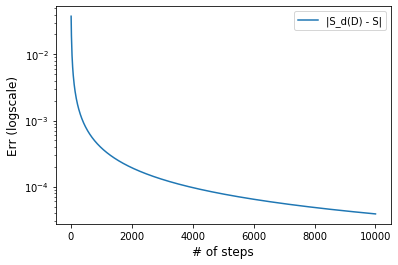

In [12]:
plt.semilogy(D_range, err, label="|S_d(D) - S|")   
plt.xlabel("# of steps", fontsize=12)
plt.ylabel("Err (logscale)", fontsize=12)
plt.legend()

## Parallel part

In [5]:
times = []
for i in range(1, 8):
    time_parallel = %timeit -o -q !mpiexec mpirun -n {i} python integral.py -parallel 1
    time_seq = %timeit -o -q !python integral.py -parallel 0
    times.append([time_parallel.average, time_seq.average])
    print(f"i: {i}, parallel: {time_parallel.average}, seq: {time_seq.average}")

i: 1, parallel: 1.40916860214287, seq: 1.3872293697142806
i: 2, parallel: 1.4271025834285556, seq: 1.3355462334285693
i: 3, parallel: 1.7646595191428511, seq: 1.3224784231428706
i: 4, parallel: 2.030331502714286, seq: 1.3316587872857082
i: 5, parallel: 2.472903680571424, seq: 1.3267717348571426
i: 6, parallel: 2.9003081169999922, seq: 1.3270956164285914
i: 7, parallel: 3.4016525227142926, seq: 1.3292012164285762


Text(0, 0.5, 'Speedup')

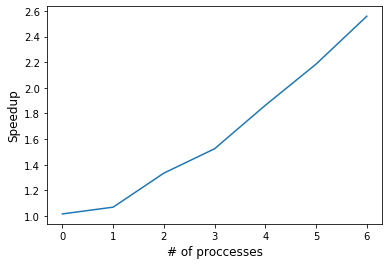

In [8]:
speedup = [x / y for x,y in times]
plt.plot(speedup)
plt.xlabel("# of proccesses", fontsize=12)
plt.ylabel("Speedup (times)", fontsize=12)